## Introduction

## Importing Cleaning Data, EDAs

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [3]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
# changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [9]:
#converting 'yr_renovated' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)

In [10]:
df.to_csv('data\Cleaned_kc_house_data.csv')

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,-122.257,1340,5650,10,2014,0,0,0,1,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,-122.319,1690,7639,12,2014,0,0,0,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,-122.233,2720,8062,2,2015,1,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,-122.393,1360,5000,12,2014,0,0,0,1,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,-122.045,1800,7503,2,2015,1,0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21597 non-null  int32  
 1   bedrooms          21597 non-null  int64  
 2   bathrooms         21597 non-null  float64
 3   sqft_living       21597 non-null  int64  
 4   sqft_lot          21597 non-null  int64  
 5   floors            21597 non-null  float64
 6   waterfront        21597 non-null  int32  
 7   view              21597 non-null  int32  
 8   condition         21597 non-null  int64  
 9   grade             21597 non-null  int64  
 10  sqft_above        21597 non-null  int64  
 11  sqft_basement     21597 non-null  int32  
 12  yr_built          21597 non-null  int64  
 13  yr_renovated      21597 non-null  int32  
 14  zipcode           21597 non-null  int64  
 15  lat               21597 non-null  float64
 16  long              21597 non-null  float6

Above chart are showing some highly correlated continuous columns. We'll be dropping 'long' and 'lat' column by using 'zipcode' instead. Also dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

### Price

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.291484e+05,3.301662,2.071596,2037.176784,1.476998e+04,1.462194,0.006575,0.227763,3.338241,7.497291,...,-119.644765,1945.496087,12471.151086,6.457471,2013.391675,0.206788,0.309441,0.267954,0.215817,0.033477
std,3.723490e+05,1.035168,0.818766,956.614171,4.083115e+04,0.574968,0.080821,0.756727,0.808427,1.599035,...,17.533235,735.892458,26944.222849,3.184560,6.375417,0.405011,0.462274,0.442904,0.411397,0.179882
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,-122.519000,0.000000,0.000000,1.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.150000e+05,3.000000,1.500000,1396.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,-122.326000,1460.000000,5000.000000,4.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.532000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,-122.224000,1820.000000,7560.000000,6.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.380000e+05,4.000000,2.500000,2530.000000,1.053000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,-122.117000,2350.000000,10009.000000,9.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,0.000000,6210.000000,871200.000000,12.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#taking a look at price
df['price'].describe()

count    2.159700e+04
mean     5.291484e+05
std      3.723490e+05
min      0.000000e+00
25%      3.150000e+05
50%      4.450000e+05
75%      6.380000e+05
max      7.700000e+06
Name: price, dtype: float64

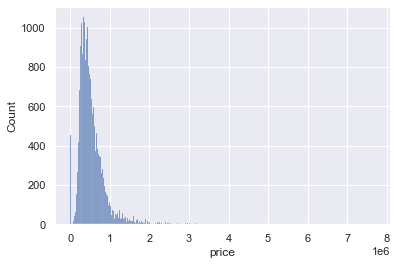

In [15]:
#using graphs to look for potential outliers
sns.histplot(data=df, x='price');

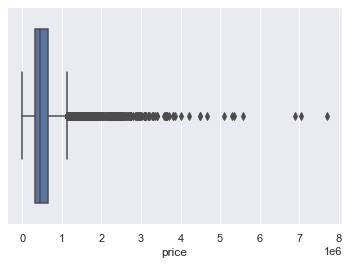

In [16]:
sns.boxplot(data=df, x='price');

In [17]:
#Making the 'price' benchmark between $100000 to $900000
df.drop(df[df['price'] > 900000].index, inplace = True)
df.drop(df[df['price'] < 100000].index, inplace = True)

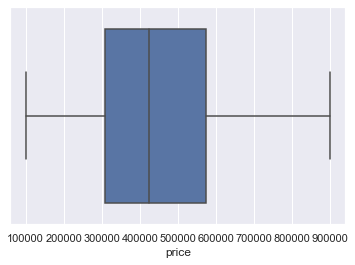

In [18]:
#checking the graphs again to see the changes we made
sns.boxplot(data=df, x='price');

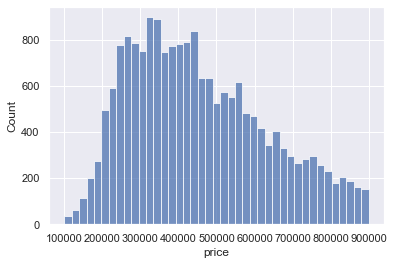

In [19]:
#The histogram looks to be more normally distributed after removing outliers
sns.histplot(data=df, x='price');

In [20]:
#checking the rows left
df.shape

(19124, 26)

### Bedrooms

In [21]:
df['bedrooms'].value_counts()

3     9179
4     5729
2     2631
5     1161
6      198
1      185
7       25
8        9
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [23]:
df['bedrooms'].value_counts()

3    9179
4    5729
2    2631
5    1161
6     198
1     185
Name: bedrooms, dtype: int64

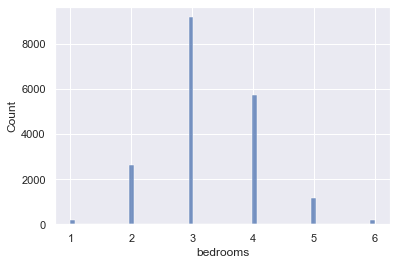

In [24]:
sns.histplot(data = df, x='bedrooms');

In [25]:
df.shape

(19083, 26)

### Bathrooms

In [26]:
df['bathrooms'].value_counts()

2.50    4849
1.00    3715
1.75    2912
2.25    1844
2.00    1839
1.50    1385
2.75     980
3.00     578
3.50     434
3.25     324
0.75      69
3.75      50
4.00      43
4.50      23
4.25      18
1.25       7
5.00       5
0.50       3
4.75       2
5.25       2
6.00       1
Name: bathrooms, dtype: int64

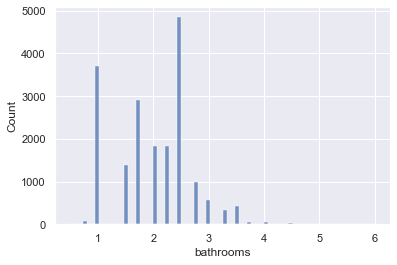

In [27]:
sns.histplot(data=df, x = 'bathrooms');

In [28]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

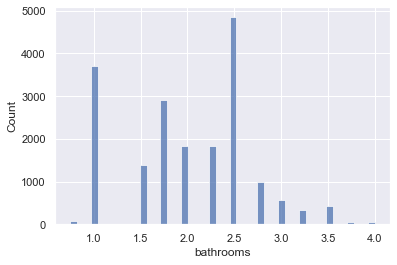

In [29]:
sns.histplot(data=df, x = 'bathrooms');

In [30]:
df.shape

(19029, 26)

### sqft_living

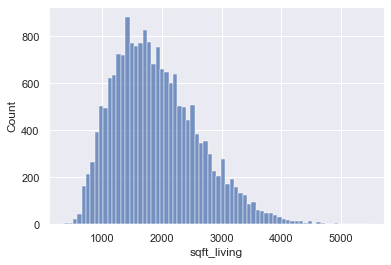

In [31]:
sns.histplot(data=df, x = 'sqft_living');

In [32]:
df['sqft_living'].describe()

count    19029.000000
mean      1915.710600
std        715.155835
min        370.000000
25%       1380.000000
50%       1820.000000
75%       2360.000000
max       5461.000000
Name: sqft_living, dtype: float64

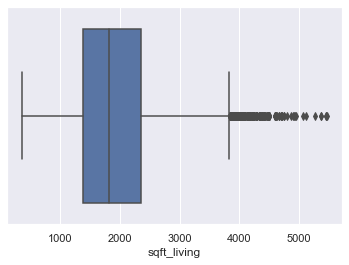

In [33]:
sns.boxplot(data = df, x='sqft_living');

In [34]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

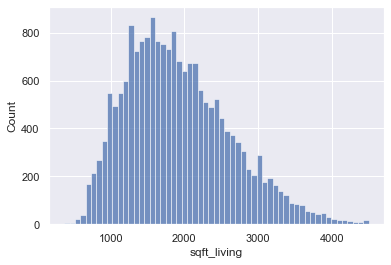

In [35]:
sns.histplot(data=df, x = 'sqft_living');

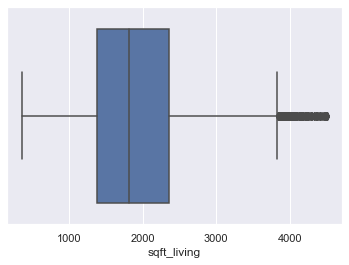

In [36]:
sns.boxplot(data = df, x='sqft_living');

In [37]:
df.shape

(19000, 26)

### sqft_lot

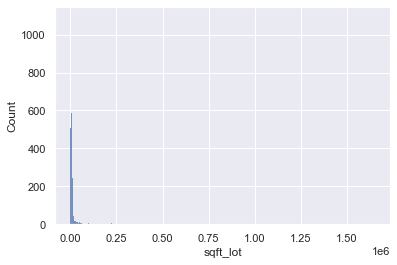

In [38]:
sns.histplot(data=df, x='sqft_lot');

In [39]:
df['sqft_lot'].describe()

count    1.900000e+04
mean     1.416697e+04
std      3.854211e+04
min      5.200000e+02
25%      5.000000e+03
50%      7.490500e+03
75%      1.016000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [40]:
df.drop(df[df['sqft_lot'] > 25000].index, inplace = True)

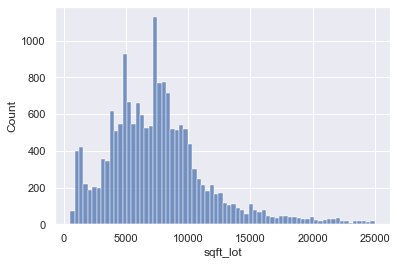

In [41]:
sns.histplot(data=df, x='sqft_lot');

In [42]:
df.shape

(17472, 26)

### sqft_basement

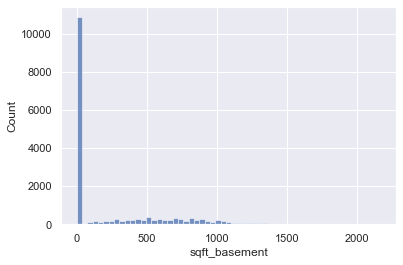

In [43]:
sns.histplot(data=df, x='sqft_basement');

In [44]:
df['sqft_basement'].value_counts()

0       10854
500       188
600       188
700       181
800       165
        ...  
666         1
906         1
1930        1
2170        1
1135        1
Name: sqft_basement, Length: 233, dtype: int64

In [45]:
df['sqft_basement'].describe()

count    17472.000000
mean       253.097184
std        385.174323
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       2170.000000
Name: sqft_basement, dtype: float64

In [46]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

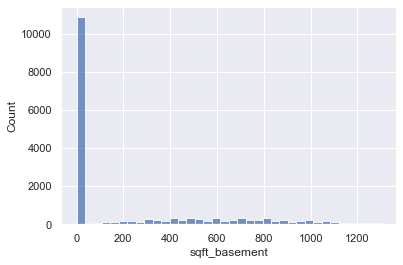

In [47]:
sns.histplot(data = df, x='sqft_basement');

In [48]:
df.shape

(17216, 26)

### floors

In [49]:
df['floors'].value_counts()

1.0    9010
2.0    6066
1.5    1524
3.0     525
2.5      85
3.5       6
Name: floors, dtype: int64

In [50]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [51]:
df['floors'].value_counts()

1.0    9010
2.0    6066
1.5    1524
3.0     525
2.5      85
Name: floors, dtype: int64

### grade and condition

In [52]:
df['grade'].value_counts()

7     8207
8     4968
6     1865
9     1570
10     363
5      190
11      28
4       18
3        1
Name: grade, dtype: int64

In [53]:
df['condition'].value_counts()

3    11256
4     4500
5     1303
2      132
1       19
Name: condition, dtype: int64

### sqft_lot15

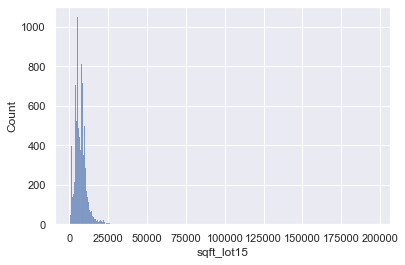

In [60]:
sns.histplot(data = df, x = 'sqft_lot15');

In [66]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

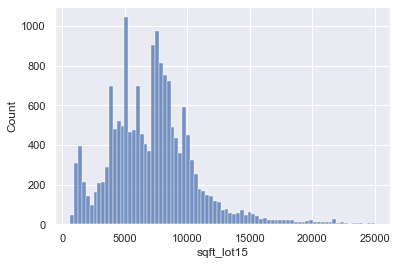

In [67]:
sns.histplot(data = df, x = 'sqft_lot15')

In [68]:
df.shape

(17110, 26)

### sqft_living15

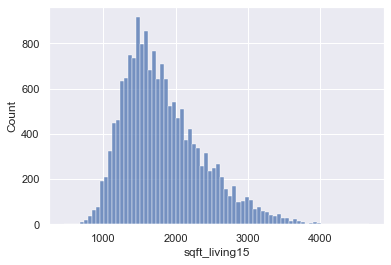

In [69]:
sns.histplot(data = df, x = 'sqft_living15');

## Multi-collineary 

In [70]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
df_cont.corr()
data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.857785
"(sqft_above, sqft_living)",0.851931
"(sqft_living, sqft_living15)",0.735705
"(sqft_living15, sqft_above)",0.714953


In [71]:
df_cont.corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
sqft_living,1.000000,0.202818,0.851931,0.309181,-0.023523,0.288471,0.735705,0.183068
sqft_lot,0.202818,1.000000,0.170822,0.066276,-0.138709,0.241378,0.240405,0.857785
sqft_above,0.851931,0.170822,1.000000,-0.234596,-0.089690,0.399040,0.714953,0.154875
sqft_basement,0.309181,0.066276,-0.234596,1.000000,0.119219,-0.189185,0.067317,0.058573
lat,-0.023523,-0.138709,-0.089690,0.119219,1.000000,-0.152922,-0.017143,-0.139801
long,0.288471,0.241378,0.399040,-0.189185,-0.152922,1.000000,0.367966,0.251962
sqft_living15,0.735705,0.240405,0.714953,0.067317,-0.017143,0.367966,1.000000,0.256299
sqft_lot15,0.183068,0.857785,0.154875,0.058573,-0.139801,0.251962,0.256299,1.000000


>Above chart are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [72]:
#Updating the df_cont
df_cont.drop('sqft_above', axis = 1, inplace = True)
df_cont.drop('sqft_living15', axis = 1, inplace = True)
df_cont.drop('sqft_lot15', axis = 1, inplace = True)

C:\Users\epcus\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
df_cont.columns

Index(['sqft_living', 'sqft_lot', 'sqft_basement', 'lat', 'long'], dtype='object')

In [ ]:
# df_cont.drop('long', axis = 1, inplace = True)
# df_cont.drop('lat', axis = 1, inplace = True)

## Viewing the Data

In [55]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold',
       'sold_spring_time', 'sold_summer_time', 'sold_fall_time',
       'sold_winter_time', 'has_renovated'],
      dtype='object')

In [56]:
#import libraries for graphing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

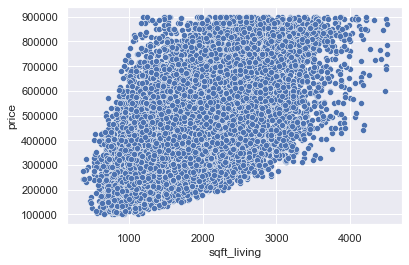

In [57]:
sns.scatterplot(data=df, x="sqft_living", y="price")